<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy 
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ? 
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [71]:
#Importation de la librairie Pandas
import pandas as pd

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [72]:
#Importation du fichier population.csv
population = pd.read_csv('population.csv')

#Importation du fichier dispo_alimentaire.csv
dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')

#Importation du fichier aide_alimentaire.csv
aide_alimentaire = pd.read_csv('aide_alimentaire.csv')
#Importation du fichier sous_nutrition.csv
sous_nutrition = pd.read_csv('sous_nutrition.csv')

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [73]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [74]:
#Consulter le nombre de colonnes
print("le tableau est constitué des colonnes :",",".join(population.columns))
#La nature des données dans chacune des colonnes
print ("--------------------------------------------")
print ("la colonne ['Zone'] est de type :",population['Zone'].dtypes)
print ("la colonne ['Année'] est de type :",population['Année'].dtypes)
print ("la colonne ['Valeur'] est de type :",population['Valeur'].dtypes)
#Le nombre de valeurs présentes dans chacune des colonnes
print ("--------------------------------------------")
print ("la colonne ['Zone'] est constituée de {} lignes".format(population['Zone'].count()))
print ("la colonne ['Année'] est constituée de {} lignes".format(population['Année'].count()))
print ("la colonne ['Valeur'] est constituée de {} lignes".format(population['Valeur'].count()))

le tableau est constitué des colonnes : Zone,Année,Valeur
--------------------------------------------
la colonne ['Zone'] est de type : object
la colonne ['Année'] est de type : int64
la colonne ['Valeur'] est de type : float64
--------------------------------------------
la colonne ['Zone'] est constituée de 1416 lignes
la colonne ['Année'] est constituée de 1416 lignes
la colonne ['Valeur'] est constituée de 1416 lignes


In [75]:
#Affichage les 5 premières lignes de la table
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [76]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
#Multiplication de la colonne valeur par 1000
population['Valeur']=population['Valeur']*1000
print(population['Valeur'].head())

0    32269589.0
1    33370794.0
2    34413603.0
3    35383032.0
4    36296113.0
Name: Valeur, dtype: float64


In [77]:
#changement du nom de la colonne Valeur par Population
population = population.rename(columns={'Valeur':'Population'})

In [78]:
#Affichage les 5 premières lignes de la table pour voir les modifications
population.head()

,Zone,Année,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [79]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(dispo_alimentaire.shape[0]))
print("Le tableau comporte {} colonne(s)".format(dispo_alimentaire.shape[1]))

Le tableau comporte 15605 observation(s) ou article(s)
Le tableau comporte 18 colonne(s)


In [80]:
#Consulter le nombre de colonnes
print("le tableau est constitué des colonnes :")
print(" | ".join(dispo_alimentaire.columns.to_list()))

le tableau est constitué des colonnes :
Zone | Produit | Origine | Aliments pour animaux | Autres Utilisations | Disponibilité alimentaire (Kcal/personne/jour) | Disponibilité alimentaire en quantité (kg/personne/an) | Disponibilité de matière grasse en quantité (g/personne/jour) | Disponibilité de protéines en quantité (g/personne/jour) | Disponibilité intérieure | Exportations - Quantité | Importations - Quantité | Nourriture | Pertes | Production | Semences | Traitement | Variation de stock


In [81]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [82]:
#remplacement des NaN dans le dataset par des 0
dispo_alimentaire.fillna(0,inplace=True)

In [83]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg
dispo_alimentaire[['Aliments pour animaux','Autres Utilisations','Disponibilité intérieure','Exportations - Quantité','Importations - Quantité','Nourriture','Pertes','Production','Semences','Traitement']]*=1000

In [84]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000.0,0.0,0.0,53000.0,0.0,53000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [85]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(aide_alimentaire.shape[0]))
print("Le tableau comporte {} colonne(s)".format(aide_alimentaire.shape[1]))

Le tableau comporte 1475 observation(s) ou article(s)
Le tableau comporte 4 colonne(s)


In [86]:
#Consulter le nombre de colonnes
print("le tableau est constitué des colonnes :",",".join(aide_alimentaire.columns))

le tableau est constitué des colonnes : Pays bénéficiaire,Année,Produit,Valeur


In [87]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [88]:
#changement du nom de la colonne Pays bénéficiaire par Zone
aide_alimentaire = aide_alimentaire.rename(columns={'Pays bénéficiaire':'zone'})

In [89]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
aide_alimentaire['Valeur']=aide_alimentaire['Valeur']*1000

In [90]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head()

,zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [91]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(sous_nutrition.shape[0]))
print("Le tableau comporte {} colonne(s)".format(sous_nutrition.shape[1]))

Le tableau comporte 1218 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [92]:
#Consulter le nombre de colonnes
print("le tableau est constitué des colonnes :",",".join(sous_nutrition.columns))

le tableau est constitué des colonnes : Zone,Année,Valeur


In [93]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [94]:
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)

sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'], errors='coerce')

#Puis remplacement des NaN en 0
sous_nutrition.fillna(0,inplace=True)

In [95]:
#changement du nom de la colonne Valeur par sous_nutrition
sous_nutrition=sous_nutrition.rename(columns={'Valeur':'sous_nutrition'})

In [96]:
#Multiplication de la colonne sous_nutrition par 1000000
sous_nutrition['sous_nutrition']=sous_nutrition['sous_nutrition']*1000000

In [97]:
# Convertir les années de sous_nutrition en format 'YYYY'
def moyenne_annees(interval):
    annees = interval.split('-')
    debut = int(annees[0])
    fin = int(annees[1])
    return (debut + fin) // 2

sous_nutrition['Année'] = sous_nutrition['Année'].apply(moyenne_annees)

In [98]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head()

,Zone,Année,sous_nutrition
0,Afghanistan,2013,8600000.0
1,Afghanistan,2014,8800000.0
2,Afghanistan,2015,8900000.0
3,Afghanistan,2016,9700000.0
4,Afghanistan,2017,10500000.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [99]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017
jointure1 = pd.merge(population[population['Année'] == 2017], sous_nutrition[sous_nutrition['Année'] == 2017], on='Zone',how='inner')

In [100]:
#Affichage du dataset
jointure1.head(10)

,Zone,Année_x,Population,Année_y,sous_nutrition
0,Afghanistan,2017,36296113.0,2017,10500000.0
1,Afrique du Sud,2017,57009756.0,2017,3100000.0
2,Albanie,2017,2884169.0,2017,100000.0
3,Algérie,2017,41389189.0,2017,1300000.0
4,Allemagne,2017,82658409.0,2017,0.0
5,Andorre,2017,77001.0,2017,0.0
6,Angola,2017,29816766.0,2017,5800000.0
7,Antigua-et-Barbuda,2017,95426.0,2017,0.0
8,Arabie saoudite,2017,33101179.0,2017,1600000.0
9,Argentine,2017,43937140.0,2017,1500000.0


In [101]:
#Calcul et affichage du nombre de personnes en état de sous nutrition 
total_sous_nutrition = jointure1['sous_nutrition'].sum().astype(int)
print ('Il y a {} personnes qui sont en état de sous nutrition'.format("{:,}".format(total_sous_nutrition)))
#Proportion de personnes en état de sous nutrition 
proportion_sous_nutrition = (total_sous_nutrition/jointure1['Population'].sum())*100
print ('Il y a {} des personnes  sont en état de sous nutrition'.format("{:,}".format(proportion_sous_nutrition)))

Il y a 535,700,000 personnes qui sont en état de sous nutrition
Il y a 7.1011968332354165 des personnes  sont en état de sous nutrition


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [102]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population
jointure2= pd.merge(dispo_alimentaire,population[population['Année'] == 2017],on='Zone',how='left')

In [103]:
#Combien mange en moyenne un être humain ? Source => 
jointure2.fillna(0,inplace=True)
moyenne_nourriture= jointure2['Nourriture'].sum()/(jointure2['Population'].unique().sum())
print ('Un être humain mange en moyenne {} tonnes'.format("{:,}".format(moyenne_nourriture)))

Un être humain mange en moyenne 0.6687224790466603 tonnes


In [104]:
#Affichage du nouveau dataframe
jointure2.head(10)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000.0,0.0,0.0,53000.0,0.0,53000.0,0.0,0.0,0.0,2017.0,36296113.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0,2017.0,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0
5,Afghanistan,"Beurre, Ghee",animale,0.0,0.0,23.0,1.17,2.61,0.03,36000.0,0.0,0.0,36000.0,0.0,36000.0,0.0,0.0,0.0,2017.0,36296113.0
6,Afghanistan,Bière,vegetale,0.0,0.0,0.0,0.09,0.00,0.00,3000.0,0.0,3000.0,3000.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0
7,Afghanistan,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5992000.0,0.0,1173000.0,4895000.0,775000.0,5169000.0,322000.0,0.0,-350.0,2017.0,36296113.0
8,Afghanistan,Boissons Alcooliques,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0
9,Afghanistan,Café,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0


In [105]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement
jointure2['dispo_kcal']= (jointure2['Disponibilité alimentaire (Kcal/personne/jour)']*jointure2['Population'])*365

In [106]:
#Calcul du nombre d'humains pouvant être nourris
nombre_nourris = round(jointure2['dispo_kcal'].sum() / (2250 * 365))
print('Il existe {} humains pouvant être nourris'.format("{:,}".format(nombre_nourris)))

Il existe 9,297,326,501 humains pouvant être nourris


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [107]:
#Transfert des données avec les végétaux dans un nouveau dataframe
vegetaux_df=jointure2[jointure2['Origine']=='vegetale']
vegetaux_df.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population,dispo_kcal
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000.0,...,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0,2017.0,36296113.0,1.324808e+10
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000.0,...,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0,1.324808e+10
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0,0.000000e+00
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000.0,...,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0,5.299232e+10
6,Afghanistan,Bière,vegetale,0.0,0.0,0.0,0.09,0.00,0.00,3000.0,...,3000.0,3000.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0,0.000000e+00


In [108]:
#Calcul du nombre de kcal disponible pour les végétaux
kcal_disponible=vegetaux_df['dispo_kcal'].sum()
print('Il existe {} kcal disponible pour les végétaux'.format("{:,}".format(kcal_disponible)))

Il existe 6,300,178,937,197,865.0 kcal disponible pour les végétaux


In [109]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux
nombre_nourris_végétaux= round(vegetaux_df['dispo_kcal'].sum()/(2250*365))
print('Il existe {} humains pouvant être nourris avec les végétaux'.format("{:,}".format(nombre_nourris_végétaux)))

Il existe 7,671,450,761 humains pouvant être nourris avec les végétaux


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [110]:
#Calcul de la disponibilité totale
disponibilité_totale= dispo_alimentaire['Disponibilité intérieure'].sum()
print("La disponibilité totale est de :", "{:,}".format(disponibilité_totale), "tonnes")

La disponibilité totale est de : 9,848,994,000.0 tonnes


In [111]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures, 
colonnes=['Aliments pour animaux','Pertes','Nourriture']
for colonne in colonnes:
    print("Colonnes :", colonne)

Colonnes : Aliments pour animaux
Colonnes : Pertes
Colonnes : Nourriture


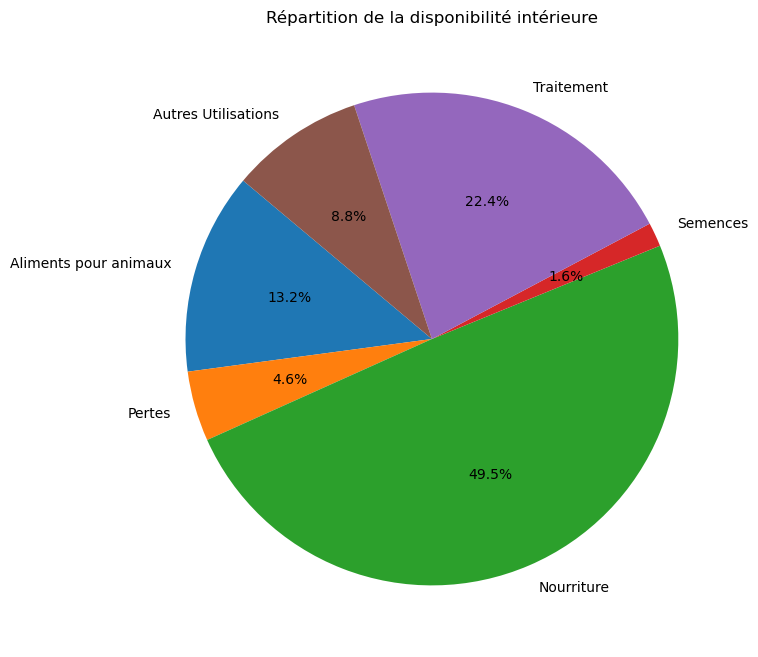

In [139]:
import matplotlib.pyplot as plt

# Définition des Proportions
proportion_aliments_animaux=dispo_alimentaire['Aliments pour animaux'].sum()/disponibilité_totale*100
proportion_Perte=dispo_alimentaire['Pertes'].sum()/disponibilité_totale*100
proportion_Nourriture=dispo_alimentaire['Nourriture'].sum()/disponibilité_totale*100
proportion_Semence=dispo_alimentaire['Semences'].sum()/disponibilité_totale*100
proportion_Traitement=dispo_alimentaire['Traitement'].sum()/disponibilité_totale*100
proportion_Autres_Utilisations=dispo_alimentaire['Autres Utilisations'].sum()/disponibilité_totale*100

# Labels pour chaque segment du camembert
labels = [
    "Aliments pour animaux",
    "Pertes",
    "Nourriture",
    "Semences",
    "Traitement",
    "Autres Utilisations"
]

# Proportions correspondantes
proportions = [
    proportion_aliments_animaux,
    proportion_Perte,
    proportion_Nourriture,
    proportion_Semence,
    proportion_Traitement,
    proportion_Autres_Utilisations
]

# Création du camembert
plt.figure(figsize=(8, 8))
plt.pie(proportions, labels=labels, autopct='%1.1f%%', startangle=140)

# Titre du camembert
plt.title('Répartition de la disponibilité intérieure')

# Affichage du camembert
plt.show()


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [112]:
#Création d'une liste avec toutes les variables
liste_variables=dispo_alimentaire['Produit'].unique().tolist()
print(liste_variables)

['Abats Comestible', 'Agrumes, Autres', 'Aliments pour enfants', 'Ananas', 'Bananes', 'Beurre, Ghee', 'Bière', 'Blé', 'Boissons Alcooliques', 'Café', 'Coco (Incl Coprah)', 'Crème', 'Céréales, Autres', 'Dattes', 'Edulcorants Autres', 'Feve de Cacao', 'Fruits, Autres', 'Graines de coton', 'Graines de tournesol', 'Graisses Animales Crue', 'Huil Plantes Oleif Autr', 'Huile Graines de Coton', "Huile d'Arachide", "Huile d'Olive", 'Huile de Colza&Moutarde', 'Huile de Palme', 'Huile de Soja', 'Huile de Sésame', 'Huile de Tournesol', 'Lait - Excl Beurre', 'Légumes, Autres', 'Légumineuses Autres', 'Maïs', 'Miel', 'Millet', 'Miscellanees', 'Noix', 'Oeufs', 'Olives', 'Oranges, Mandarines', 'Orge', 'Plantes Oleiferes, Autre', 'Poissons Eau Douce', 'Poivre', 'Pommes', 'Pommes de Terre', 'Raisin', 'Riz (Eq Blanchi)', 'Sucre Eq Brut', 'Sucre, betterave', 'Sucre, canne', 'Sésame', 'Thé', 'Tomates', "Viande d'Ovins/Caprins", 'Viande de Bovins', 'Viande de Volailles', 'Viande, Autre', 'Vin', 'Épices, Aut

In [113]:
#Création d'un dataframe avec les informations uniquement pour ces céréales
cereales = ['Blé', 'Céréales', 'Maïs', 'Millet', 'Orge','Riz (Eq Blanchi)','Avoine','Seigle','Sorgho','Céréales, Autres']
df_cereales=dispo_alimentaire[dispo_alimentaire['Produit'].isin(cereales)].reset_index(drop=True)

In [114]:
#Affichage de la proportion d'alimentation animale
df_cereales.columns

Index(['Zone', 'Produit', 'Origine', 'Aliments pour animaux',
       'Autres Utilisations', 'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Semences', 'Traitement', 'Variation de stock'],
      dtype='object')

In [179]:
#Affichage de la proportion d'alimentation animale
print("Proportion d'alimentation animale :", "{:.2f}".format(df_cereales['Aliments pour animaux'].sum()*100/df_cereales['Disponibilité intérieure'].sum()), "%")
print("Proportion d'alimentation humaine :", "{:.2f}".format(df_cereales['Nourriture'].sum()*100/df_cereales['Disponibilité intérieure'].sum()), "%")

Proportion d'alimentation animale : 36.29 %
Proportion d'alimentation humaine : 42.75 %


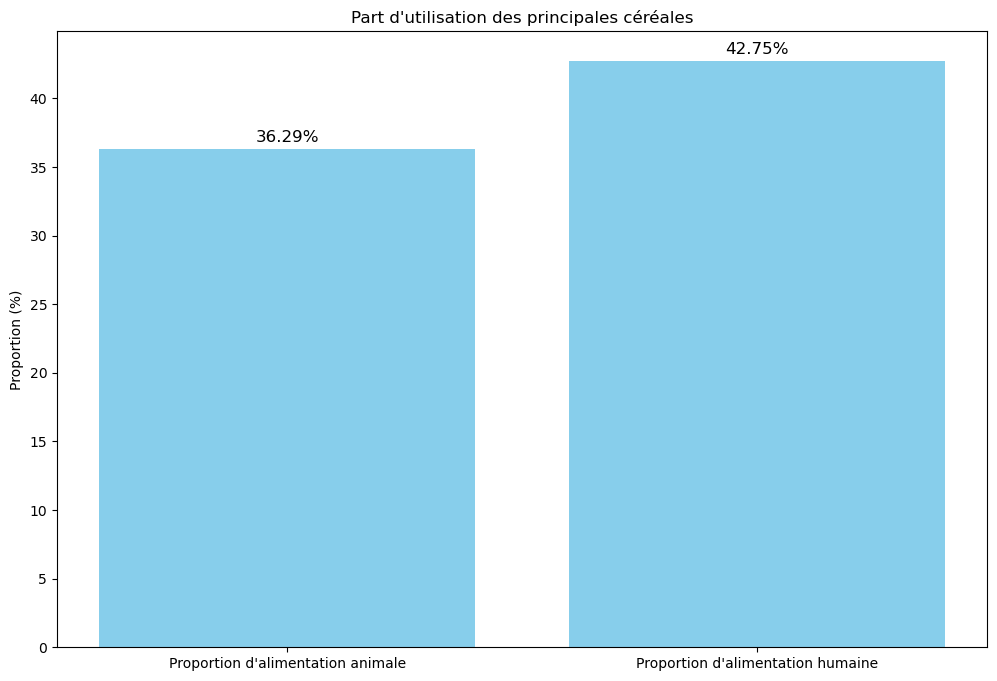

In [185]:
proportion_alimentation_animal=df_cereales['Aliments pour animaux'].sum()*100/df_cereales['Disponibilité intérieure'].sum()
proportion_alimantation_humaine=df_cereales['Nourriture'].sum()*100/df_cereales['Disponibilité intérieure'].sum()
labels = [ "Proportion d'alimentation animale", "Proportion d'alimentation humaine"]
proportions = [ proportion_alimentation_animal, proportion_alimantation_humaine]
plt.figure(figsize=(12, 8))
plt.bar(labels,proportions, color='skyblue')
plt.title('Part d\'utilisation des principales céréales')
plt.ylabel('Proportion (%)')
for i, value in enumerate(proportions):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', fontsize=12)
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [116]:
#Création de la colonne proportion par pays
jointure1['proportion_pays'] = (jointure1['sous_nutrition']/jointure1['Population'])*100

In [117]:
jointure1.head()

,Zone,Année_x,Population,Année_y,sous_nutrition,proportion_pays
0,Afghanistan,2017,36296113.0,2017,10500000.0,28.928718
1,Afrique du Sud,2017,57009756.0,2017,3100000.0,5.437666
2,Albanie,2017,2884169.0,2017,100000.0,3.467203
3,Algérie,2017,41389189.0,2017,1300000.0,3.140917
4,Allemagne,2017,82658409.0,2017,0.0,0.000000


In [142]:
#affichage après trie des 10 pires pays
top_10=jointure1.sort_values(by='proportion_pays',ascending=False).head(10).reset_index()
print (top_10)

   index                                        Zone  Année_x  Population  \
0     78                                       Haïti     2017  10982366.0   
1    157  République populaire démocratique de Corée     2017  25429825.0   
2    108                                  Madagascar     2017  25570512.0   
3    103                                     Libéria     2017   4702226.0   
4    100                                     Lesotho     2017   2091534.0   
5    183                                       Tchad     2017  15016753.0   
6    161                                      Rwanda     2017  11980961.0   
7    121                                  Mozambique     2017  28649018.0   
8    186                                 Timor-Leste     2017   1243258.0   
9      0                                 Afghanistan     2017  36296113.0   

   Année_y  sous_nutrition  proportion_pays  
0     2017       5300000.0        48.259182  
1     2017      12000000.0        47.188685  
2     2017    

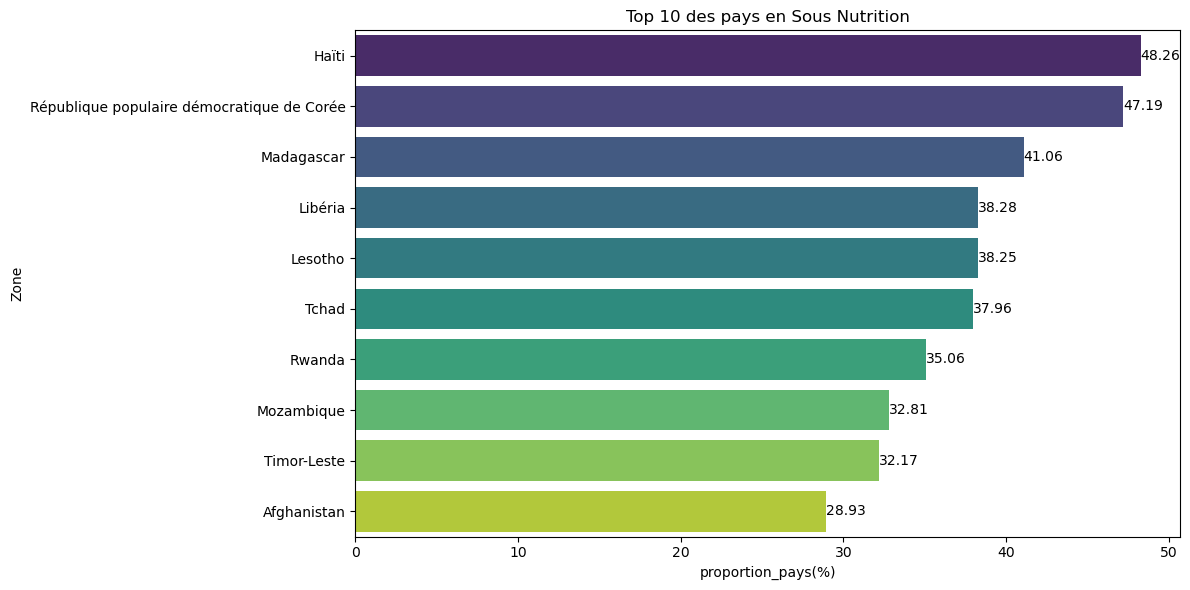

In [154]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.barplot(x='proportion_pays', y='Zone', data=top_10, palette='viridis')
plt.xlabel('proportion_pays(%)')
plt.ylabel('Zone')
plt.title('Top 10 des pays en Sous Nutrition')
for index, value in enumerate(top_10['proportion_pays']):
    plt.text(value, index, f'{value:.2f}', va='center')
plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [119]:
#calcul du total de l'aide alimentaire par pays
aide_alimentaire['Valeur'] = pd.to_numeric(aide_alimentaire['Valeur'], errors='coerce')

aide_alimentaire.fillna(0,inplace=True)

total_aide_alimentaire = aide_alimentaire.groupby('zone')['Valeur'].sum().reset_index()

In [120]:
#affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire
total_aide_alimentaire.sort_values(by='Valeur',ascending=False).head(10)

,zone,Valeur
50,République arabe syrienne,1858943000
75,Éthiopie,1381294000
70,Yémen,1206484000
61,Soudan du Sud,695248000
60,Soudan,669784000
30,Kenya,552836000
3,Bangladesh,348188000
59,Somalie,292678000
53,République démocratique du Congo,288502000
43,Niger,276344000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [121]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année 
import pandas as pd
df_aide_alimentaire = pd.DataFrame(aide_alimentaire[['zone','Année','Valeur']])
df_aide_alimentaire.groupby(['zone','Année'])['Valeur'].sum().reset_index()

,zone,Année,Valeur
0,Afghanistan,2013,128238000
1,Afghanistan,2014,57214000
2,Algérie,2013,35234000
3,Algérie,2014,18980000
4,Algérie,2015,17424000
...,...,...,...
223,Égypte,2013,1122000
224,Équateur,2013,1362000
225,Éthiopie,2013,591404000
226,Éthiopie,2014,586624000


In [122]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire
top_pays_aide_alimentaire= df_aide_alimentaire.groupby(['zone'])['Valeur'].sum().reset_index()
top_5_pays = top_pays_aide_alimentaire.sort_values(by='Valeur',ascending=False).head(5)
list_top_5_pays = top_5_pays['zone'].tolist()
print(list_top_5_pays)

['République arabe syrienne', 'Éthiopie', 'Yémen', 'Soudan du Sud', 'Soudan']


In [123]:
#On filtre sur le dataframe avec notre liste
selection_pays = df_aide_alimentaire.loc[(df_aide_alimentaire['zone'] == 'République arabe syrienne') | 
                                         (df_aide_alimentaire['zone'] == 'Éthiopie') |
                                         (df_aide_alimentaire['zone'] == 'Yémen') |
                                         (df_aide_alimentaire['zone'] == 'Soudan du Sud') |
                                         (df_aide_alimentaire['zone'] == 'Soudan')]

In [155]:
# Affichage des pays avec l'aide alimentaire par année
selection_pays.groupby(['zone','Année'])['Valeur'].sum().reset_index()

,zone,Année,Valeur
0,République arabe syrienne,2013,563566000
1,République arabe syrienne,2014,651870000
2,République arabe syrienne,2015,524949000
3,République arabe syrienne,2016,118558000
4,Soudan,2013,330230000
5,Soudan,2014,321904000
6,Soudan,2015,17650000
7,Soudan du Sud,2013,196330000
8,Soudan du Sud,2014,450610000
9,Soudan du Sud,2015,48308000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [125]:
#Calcul de la disponibilité en kcal par personne par jour par pays
dispo_kcal_pays=dispo_alimentaire.groupby(['Zone'])['Disponibilité alimentaire (Kcal/personne/jour)'].sum().reset_index()

In [126]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne 
dispo_kcal_pays.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)',ascending=True).head(10)

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
128,République centrafricaine,1879.0
166,Zambie,1924.0
91,Madagascar,2056.0
0,Afghanistan,2087.0
65,Haïti,2089.0
133,République populaire démocratique de Corée,2093.0
151,Tchad,2109.0
167,Zimbabwe,2113.0
114,Ouganda,2126.0
154,Timor-Leste,2129.0


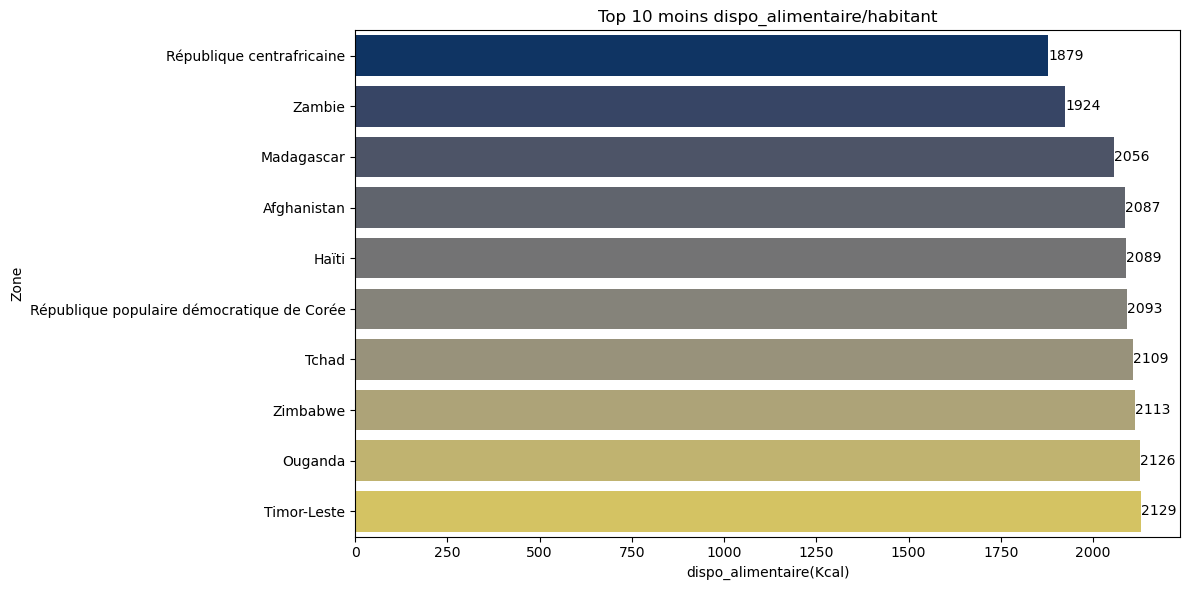

In [163]:
top_10=dispo_kcal_pays.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)',ascending=True).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Disponibilité alimentaire (Kcal/personne/jour)', y='Zone', data=top_10, palette='cividis')
plt.xlabel('dispo_alimentaire(Kcal)')
plt.ylabel('Zone')
plt.title('Top 10 moins dispo_alimentaire/habitant')
for index, value in enumerate(top_10['Disponibilité alimentaire (Kcal/personne/jour)']):
    plt.text(value, index, f'{value:.0f}', va='center')
plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

In [127]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne 
dispo_kcal_pays.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)',ascending=False).head(10)

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
11,Autriche,3770.0
16,Belgique,3737.0
159,Turquie,3708.0
171,États-Unis d'Amérique,3682.0
74,Israël,3610.0
72,Irlande,3602.0
75,Italie,3578.0
89,Luxembourg,3540.0
168,Égypte,3518.0
4,Allemagne,3503.0


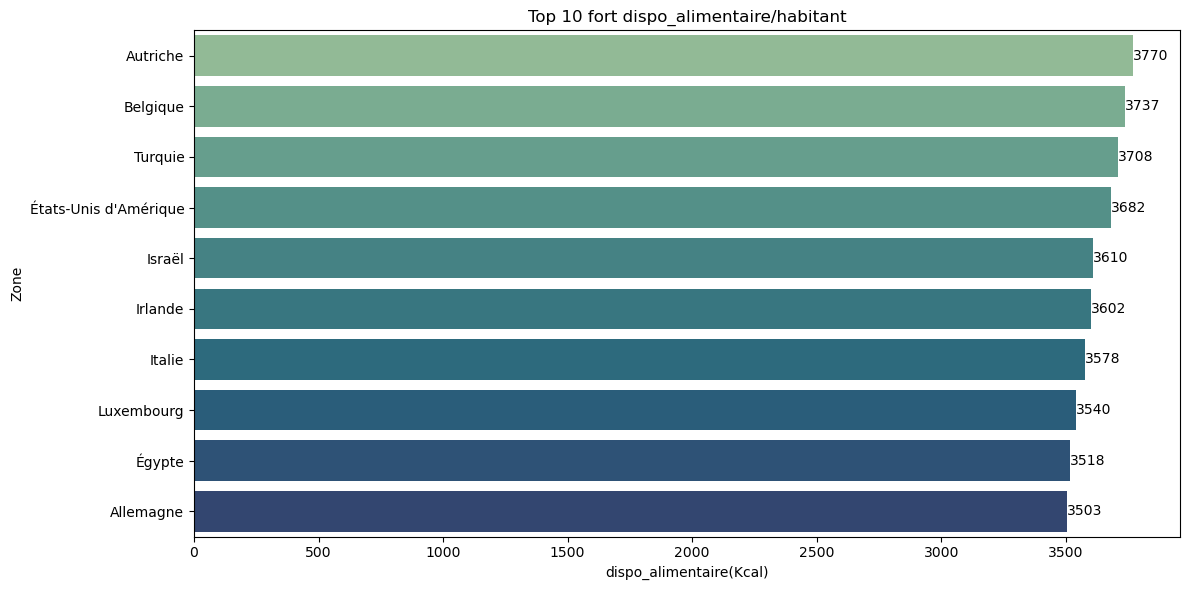

In [168]:
top1_10=dispo_kcal_pays.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)',ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Disponibilité alimentaire (Kcal/personne/jour)', y='Zone', data=top1_10, palette='crest')
plt.xlabel('dispo_alimentaire(Kcal)')
plt.ylabel('Zone')
plt.title('Top 10 fort dispo_alimentaire/habitant')
for index, value in enumerate(top1_10['Disponibilité alimentaire (Kcal/personne/jour)']):
    plt.text(value, index, f'{value:.0f}', va='center')
plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [128]:
#création d'un dataframe avec uniquement la Thaïlande 
jointure3=pd.merge(dispo_alimentaire,sous_nutrition[sous_nutrition['Année'] == 2017],on='Zone',how='left')
Thaïlande_df=jointure3[jointure3['Zone']=='Thaïlande']
Thaïlande_df.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,sous_nutrition
13759,Thaïlande,Abats Comestible,animale,0.0,0.0,3.0,1.11,0.09,0.56,74000.0,5000.0,33000.0,75000.0,0.0,45000.0,0.0,0.0,0.0,2017.0,6200000.0
13760,Thaïlande,"Agrumes, Autres",vegetale,0.0,0.0,0.0,0.09,0.00,0.00,8000.0,6000.0,2000.0,6000.0,0.0,12000.0,0.0,2000.0,0.0,2017.0,6200000.0
13761,Thaïlande,"Alcool, non Comestible",vegetale,0.0,358000.0,0.0,0.00,0.00,0.00,358000.0,110000.0,21000.0,0.0,0.0,447000.0,0.0,0.0,0.0,2017.0,6200000.0
13762,Thaïlande,Aliments pour enfants,vegetale,0.0,0.0,2.0,0.18,0.01,0.08,12000.0,7000.0,19000.0,12000.0,0.0,0.0,0.0,0.0,0.0,2017.0,6200000.0
13763,Thaïlande,Ananas,vegetale,0.0,0.0,10.0,10.02,0.04,0.08,782000.0,1449000.0,9000.0,671000.0,110000.0,2209000.0,0.0,0.0,13.0,2017.0,6200000.0


In [129]:
#Calcul de la sous nutrition en Thaïlande
sous_nutrition_globale= Thaïlande_df['sous_nutrition'].unique().sum().astype(int)
print("La sous nutrition en Thaïlande est de :", "{:,}".format(sous_nutrition_globale))

La sous nutrition en Thaïlande est de : 6,200,000


In [178]:
# On calcule la proportion exportée en fonction de la proportion
Exportation_globale=Thaïlande_df['Exportations - Quantité'].sum().astype(int)

Production_globale=Thaïlande_df['Production'].sum().astype(int)

proportion_export=(Exportation_globale/Production_globale)*100

disponibilité_gloabale= Thaïlande_df['Disponibilité alimentaire (Kcal/personne/jour)'].sum().astype(int)

print("La Thaïlande produit :", "{:,}".format(Production_globale),'tonnes')
print("La Thaïlande exporte :", "{:,}".format(Exportation_globale),'tonnes')
print("La Thaïlande exporte :", "{:.2f}".format(proportion_export),'% en fonction de sa production')
print("La disponibilité par habitant est de :", "{:,}".format(disponibilité_gloabale),'Kcal')

La Thaïlande produit : 201,764,000 tonnes
La Thaïlande exporte : 50,430,000 tonnes
La Thaïlande exporte : 24.99 % en fonction de sa production
La disponibilité par habitant est de : 2,785 Kcal


In [177]:
Manioc_data=Thaïlande_df[Thaïlande_df['Produit'] == 'Manioc']

Exportation_globale_Manioc=Manioc_data['Exportations - Quantité'].sum().astype(int)

Production_globale_Manioc=Manioc_data['Production'].sum().astype(int)

proportion_export_Manioc=(Exportation_globale_Manioc/Production_globale_Manioc)*100


print("La Thaïlande produit :", "{:,}".format(Production_globale_Manioc),'tonnes de Manioc')
print("La Thaïlande exporte :", "{:,}".format(Exportation_globale_Manioc),'tonnes de Manioc')
print("La Thaïlande exporte :", "{:.2f}".format(proportion_export_Manioc),'% en fonction de sa production de Manioc')

La Thaïlande produit : 30,228,000 tonnes de Manioc
La Thaïlande exporte : 25,214,000 tonnes de Manioc
La Thaïlande exporte : 83.41 % en fonction de sa production de Manioc


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse complémentaires</h2>
</div>

In [131]:
#Rajouter en dessous toutes les analyses complémtaires suite à la demande de mélanie :
#"et toutes les infos que tu trouverais utiles pour mettre en relief les pays qui semblent être 
#le plus en difficulté au niveau alimentaire"

In [195]:
Production_Globale_pays=dispo_alimentaire.groupby(['Zone'])['Production'].sum().astype(int).reset_index()
Exportation_Globale_pays=dispo_alimentaire.groupby(['Zone'])['Exportations - Quantité'].sum().astype(int).reset_index()
Importation_Globale_pays=dispo_alimentaire.groupby(['Zone'])['Importations - Quantité'].sum().astype(int).reset_index()
df_fusion=pd.merge(Production_Globale_pays, Exportation_Globale_pays, on='Zone')
df_fusion=pd.merge(df_fusion, Importation_Globale_pays, on='Zone')
df_fusion.columns = ['Zone', 'Production_Globale', 'Exportation_Globale','Importation_Globale']
df_fusion['proportion_export_global']=(df_fusion['Exportation_Globale']/df_fusion['Production_Globale'])*100
df_fusion.sort_values(by='Exportation_Globale',ascending=False).head(10)

,Zone,Production_Globale,Exportation_Globale,Importation_Globale,proportion_export_global
171,États-Unis d'Amérique,894668000,163524000,81887000,18.277618
23,Brésil,1143605000,126552000,16817000,11.066059
53,France,178136000,65945000,33769000,37.019468
4,Allemagne,154547000,57431000,65353000,37.160864
31,Canada,127553000,54771000,19422000,42.939798
8,Argentine,176124000,52333000,1212000,29.713724
119,Pays-Bas,41636000,52179000,52910000,125.321837
153,Thaïlande,201764000,50430000,11335000,24.994548
10,Australie,100956000,43184000,5879000,42.775070
68,Inde,1126270000,40807000,18954000,3.623199


In [199]:
df_fusion.sort_values(by='Production_Globale',ascending=False).head(10)

,Zone,Production_Globale,Exportation_Globale,Importation_Globale,proportion_export_global
36,"Chine, continentale",1930913000,36060000,156246000,1.867510
23,Brésil,1143605000,126552000,16817000,11.066059
68,Inde,1126270000,40807000,18954000,3.623199
171,États-Unis d'Amérique,894668000,163524000,81887000,18.277618
54,Fédération de Russie,263296000,26777000,30449000,10.169923
69,Indonésie,238559000,31912000,23466000,13.376984
153,Thaïlande,201764000,50430000,11335000,24.994548
108,Nigéria,179631000,748000,14510000,0.416409
53,France,178136000,65945000,33769000,37.019468
8,Argentine,176124000,52333000,1212000,29.713724


In [197]:
df_fusion.sort_values(by='Production_Globale',ascending=True).head(10)

,Zone,Production_Globale,Exportation_Globale,Importation_Globale,proportion_export_global
18,Bermudes,6000,24000,77000,400.000000
34,Chine - RAS de Macao,16000,2000,367000,12.500000
6,Antigua-et-Barbuda,20000,0,63000,0.000000
135,Saint-Kitts-et-Nevis,40000,1000,22000,2.500000
58,Grenade,47000,3000,48000,6.382979
22,Brunéi Darussalam,60000,11000,244000,18.333333
137,Sainte-Lucie,68000,19000,84000,27.941176
45,Djibouti,76000,113000,1628000,148.684211
110,Nouvelle-Calédonie,78000,5000,201000,6.410256
46,Dominique,119000,5000,29000,4.201681


In [200]:
df_fusion.sort_values(by='Importation_Globale',ascending=False).head(10)

,Zone,Production_Globale,Exportation_Globale,Importation_Globale,proportion_export_global
36,"Chine, continentale",1930913000,36060000,156246000,1.867510
171,États-Unis d'Amérique,894668000,163524000,81887000,18.277618
4,Allemagne,154547000,57431000,65353000,37.160864
77,Japon,58951000,1278000,55414000,2.167902
119,Pays-Bas,41636000,52179000,52910000,125.321837
126,Royaume-Uni,67602000,13177000,43196000,19.492027
75,Italie,80855000,23643000,38692000,29.241234
16,Belgique,24496000,30345000,35276000,123.877368
53,France,178136000,65945000,33769000,37.019468
48,Espagne,99740000,29240000,32608000,29.316222
